In [1]:
import pandas as pd
import numpy as np

## 7.1 計算布林陣列的統計資訊

In [ ]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')
print(movie[['duration']].head(10))

                                            duration
movie_title                                         
Avatar                                         178.0
Pirates of the Caribbean: At World's End       169.0
Spectre                                        148.0
The Dark Knight Rises                          164.0
Star Wars: Episode VII - The Force Awakens       NaN
John Carter                                    132.0
Spider-Man 3                                   156.0
Tangled                                        100.0
Avengers: Age of Ultron                        141.0
Harry Potter and the Half-Blood Prince         153.0


In [4]:
# 尋找片長大於2小時的電影
movie_2_hours = movie['duration'] > 120
print(movie_2_hours.head(10))

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool


In [5]:
# 計算總數
print(movie_2_hours.sum())

# 計算百分比
print(movie_2_hours.mean() * 100)

1039
21.13506916192026


In [6]:
# 去除NaN 運算
print(movie['duration'].dropna().gt(120).mean() * 100)

21.199755152009793


In [7]:
# 輸出摘要統計
print(movie_2_hours.describe())

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object


In [8]:
# 轉換資料型別為整數
print(movie_2_hours.astype(int).describe())

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64


In [11]:
# True False 總數
print(movie['duration'].dropna().gt(120).value_counts(normalize=True))

duration
False    0.788002
True     0.211998
Name: proportion, dtype: float64


In [13]:
# 多欄位比較
actors = movie[['actor_1_facebook_likes',
                'actor_2_facebook_likes']].dropna()

print((actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean())

0.9777687130328371


## 7.2 設定多個布林條件

In [2]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')

In [3]:
# 設定多個篩選器
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) | (movie.title_year > 2009))

# 結合多個條件
criteria_final = criteria1 & criteria2 & criteria3
print(criteria_final.head())

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool


## 7.3 以布林陣列來進行過濾

In [ ]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')

In [4]:
# 設定第一組條件
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a = crit_a1 & crit_a2 & crit_a3

# 設定第二組條件
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) | (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [5]:
final_crit_all = final_crit_a | final_crit_b
print(final_crit_all.head())

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool


In [6]:
# 布林陣列篩選
print(movie[final_crit_all].head())

                            color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
The Lovers                  Color       Roland Joffé                    10.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   

                            duration  director_facebook_likes  \
movie_title                                                     
The Dark Knight Rises          164.0                  22000.0   
The Avengers                   173.0                      0.0   
Captain America: Civil War     147.0                     94.0   
The Lovers                     109.0                    596.0   
Guardians of the Galaxy        121.0             

In [7]:
# 用loc 也可以進行一樣的篩選
print(movie.loc[final_crit_all].head())

                            color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
The Lovers                  Color       Roland Joffé                    10.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   

                            duration  director_facebook_likes  \
movie_title                                                     
The Dark Knight Rises          164.0                  22000.0   
The Avengers                   173.0                      0.0   
Captain America: Civil War     147.0                     94.0   
The Lovers                     109.0                    596.0   
Guardians of the Galaxy        121.0             

In [ ]:
# 用loc檢查條件是否符合
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
print(movie_filtered.head(10))

                            imdb_score content_rating  title_year
movie_title                                                      
The Dark Knight Rises              8.5          PG-13      2012.0
The Avengers                       8.1          PG-13      2012.0
Captain America: Civil War         8.2          PG-13      2016.0
The Lovers                         4.5              R      2015.0
Guardians of the Galaxy            8.1          PG-13      2014.0
Interstellar                       8.6          PG-13      2014.0
Inception                          8.8          PG-13      2010.0
The Martian                        8.1          PG-13      2015.0
Town & Country                     4.4              R      2001.0
Sex and the City 2                 4.3              R      2010.0


In [11]:
# 使用iloc 屬性
print(movie.iloc[final_crit_all.to_numpy()])

                            color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
The Lovers                  Color       Roland Joffé                    10.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   
...                           ...                ...                     ...   
The Canyons                 Color      Paul Schrader                   162.0   
Butterfly                   Color        Matt Cimber                    15.0   
The Gallows                 Color       Travis Cluff                   159.0   
The Legend of God's Gun     Color         Mike Bruce                     3.0   
Exeter                      Color      M

## 7.4 布林選取 vs 索引選取

In [2]:
# 載入資料集
college = pd.read_csv('../../data/college.csv')

# 使用布林選取
print(college[college['STABBR'] == 'TX'].head())

                            INSTNM        CITY STABBR  HBCU  MENONLY  \
3610  Abilene Christian University     Abilene     TX   0.0      0.0   
3611       Alvin Community College       Alvin     TX   0.0      0.0   
3612              Amarillo College    Amarillo     TX   0.0      0.0   
3613              Angelina College      Lufkin     TX   0.0      0.0   
3614       Angelo State University  San Angelo     TX   0.0      0.0   

      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  ...  UGDS_2MOR  \
3610        0.0         1     530.0     545.0           0.0  ...     0.0454   
3611        0.0         0       NaN       NaN           0.0  ...     0.0002   
3612        0.0         0       NaN       NaN           0.0  ...     0.0000   
3613        0.0         0       NaN       NaN           0.0  ...     0.0264   
3614        0.0         0     475.0     490.0           0.0  ...     0.0285   

      UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
3610    0.0423 

In [3]:
# 指定索引
college2 = college.set_index('STABBR')

# 索引選取
print(college2.loc['TX'].head())

                              INSTNM        CITY  HBCU  MENONLY  WOMENONLY  \
STABBR                                                                       
TX      Abilene Christian University     Abilene   0.0      0.0        0.0   
TX           Alvin Community College       Alvin   0.0      0.0        0.0   
TX                  Amarillo College    Amarillo   0.0      0.0        0.0   
TX                  Angelina College      Lufkin   0.0      0.0        0.0   
TX           Angelo State University  San Angelo   0.0      0.0        0.0   

        RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY    UGDS  ...  UGDS_2MOR  \
STABBR                                                      ...              
TX             1     530.0     545.0           0.0  3572.0  ...     0.0454   
TX             0       NaN       NaN           0.0  4682.0  ...     0.0002   
TX             0       NaN       NaN           0.0  9346.0  ...     0.0000   
TX             0       NaN       NaN           0.0  3825.0  ...

In [6]:
# 比較執行時間
%timeit college[college['STABBR'] == 'TX']

%timeit college2 = college.set_index('STABBR')

%timeit college2.loc['TX']

427 μs ± 6.35 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
671 μs ± 24.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
168 μs ± 2.01 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
# 選取多個州別
states = ['TX', 'CA', 'NY']
print(college[college['STABBR'].isin(states)])

                                                 INSTNM              CITY  \
192                           Academy of Art University     San Francisco   
193              ITT Technical Institute-Rancho Cordova    Rancho Cordova   
194      Academy of Chinese Culture and Health Sciences           Oakland   
195            The Academy of Radio and TV Broadcasting  Huntington Beach   
196                Avalon School of Cosmetology-Alameda           Alameda   
...                                                 ...               ...   
7528                           WestMed College - Merced            Merced   
7529                                    Vantage College           El Paso   
7530         SAE Institute of Technology  San Francisco        Emeryville   
7533  Bay Area Medical Academy - San Jose Satellite ...          San Jose   
7534            Excel Learning Center-San Antonio South       San Antonio   

     STABBR  HBCU  MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
192 

In [8]:
# loc 直接傳遞list 即可
print(college2.loc[states])

                                               INSTNM        CITY  HBCU  \
STABBR                                                                    
TX                       Abilene Christian University     Abilene   0.0   
TX                            Alvin Community College       Alvin   0.0   
TX                                   Amarillo College    Amarillo   0.0   
TX                                   Angelina College      Lufkin   0.0   
TX                            Angelo State University  San Angelo   0.0   
...                                               ...         ...   ...   
NY                      Briarcliffe College–Patchogue   Patchogue   NaN   
NY                       Jamestown Business College -   Salamanca   NaN   
NY      Pratt Manhattan-A Division of Pratt Institute    New York   NaN   
NY                  Saint Josephs College-Long Island   Patchogue   NaN   
NY        Franklin Career Institute - Brooklyn Campus    Brooklyn   NaN   

        MENONLY  WOMENON

## 7.5 用唯一或以排序的索引標籤來選取資料

In [13]:
# 載入資料集
college = pd.read_csv('../../data/college.csv')

# 指定索引
college2 = college.set_index('STABBR')

# 檢查索引是否排序
idx = college2.index
is_sorted = idx.is_monotonic_increasing or idx.is_monotonic_decreasing
print(is_sorted)

False


In [14]:
# 排序資料
college3 = college2.sort_index()

# 檢查索引是否排序
idx = college3.index
is_sorted = idx.is_monotonic_increasing or idx.is_monotonic_decreasing
print(is_sorted)

True


In [15]:
# 計算時間
%timeit college3.loc['TX']

24 μs ± 469 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
# 設定不重複的欄位當作索引
college_unique = college.set_index('INSTNM')

# 檢查索引是否唯一
college_unique.index.is_unique

True

In [18]:
# 使用布林選取
print(college[college['INSTNM'] == 'Stanford University'])

                   INSTNM      CITY STABBR  HBCU  MENONLY  WOMENONLY  \
4217  Stanford University  Stanford     CA   0.0      0.0        0.0   

      RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  ...  UGDS_2MOR  UGDS_NRA  \
4217         0     730.0     745.0           0.0  ...     0.1067    0.0819   

      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
4217     0.0031       0.0         1   0.1556    0.1256   0.0401   

      MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
4217            86000               12782  

[1 rows x 27 columns]


In [19]:
# 使用索引選取
print(college_unique.loc['Stanford University'])

CITY                  Stanford
STABBR                      CA
HBCU                       0.0
MENONLY                    0.0
WOMENONLY                  0.0
RELAFFIL                     0
SATVRMID                 730.0
SATMTMID                 745.0
DISTANCEONLY               0.0
UGDS                    7018.0
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                   0.0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object


In [20]:
# 使用索引選取 但回傳df
print(college_unique.loc[['Stanford University']])

                         CITY STABBR  HBCU  MENONLY  WOMENONLY  RELAFFIL  \
INSTNM                                                                     
Stanford University  Stanford     CA   0.0      0.0        0.0         0   

                     SATVRMID  SATMTMID  DISTANCEONLY    UGDS  ...  UGDS_2MOR  \
INSTNM                                                         ...              
Stanford University     730.0     745.0           0.0  7018.0  ...     0.1067   

                     UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                  
Stanford University    0.0819     0.0031       0.0         1   0.1556   

                     PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                       
Stanford University    0.1256   0.0401            86000               12782  

[1 rows x 26 columns]


In [21]:
# 比較時間
%timeit college[college['INSTNM'] == 'Stanford University']

%timeit college_unique.loc[['Stanford University']]

402 μs ± 7.96 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
129 μs ± 4.04 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [22]:
# 製造多個條件合併的索引
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
print(college.head())

                                 INSTNM      CITY STABBR  HBCU  MENONLY  \
ARTESIA, CA           Angeles Institute   ARTESIA     CA   0.0      0.0   
Aberdeen, SD       Presentation College  Aberdeen     SD   0.0      0.0   
Aberdeen, SD  Northern State University  Aberdeen     SD   0.0      0.0   
Aberdeen, WA       Grays Harbor College  Aberdeen     WA   0.0      0.0   
Abilene, TX   Hardin-Simmons University   Abilene     TX   0.0      0.0   

              WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  ...  \
ARTESIA, CA         0.0         0       NaN       NaN           0.0  ...   
Aberdeen, SD        0.0         1     440.0     480.0           0.0  ...   
Aberdeen, SD        0.0         0     480.0     475.0           0.0  ...   
Aberdeen, WA        0.0         0       NaN       NaN           0.0  ...   
Abilene, TX         0.0         1     508.0     515.0           0.0  ...   

              UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
ARTESIA, CA    

In [23]:
# 使用 loc 查詢合併索引
print(college.loc['Miami, FL'].head())

                                              INSTNM   CITY STABBR  HBCU  \
Miami, FL        New Professions Technical Institute  Miami     FL   0.0   
Miami, FL               Management Resources College  Miami     FL   0.0   
Miami, FL                   Strayer University-Doral  Miami     FL   NaN   
Miami, FL                   Keiser University- Miami  Miami     FL   NaN   
Miami, FL  George T Baker Aviation Technical College  Miami     FL   0.0   

           MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   
Miami, FL      NaN        NaN         1       NaN       NaN           NaN   
Miami, FL      NaN        NaN         1       NaN       NaN           NaN   
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   

           ...  UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
M

In [24]:
# 比較時間
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
%timeit college[crit1 & crit2]

%timeit college.loc['Miami, FL']

101 μs ± 2.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
23.3 μs ± 2.17 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 7.6 利用Pandas 實現SQL 中的功能

In [2]:
# 載入資料集
employee = pd.read_csv('../../data/employee.csv')

In [4]:
# 觀察資料集
print(employee.dtypes)

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object


In [5]:
# 查看部門分布
print(employee.DEPARTMENT.value_counts())

DEPARTMENT
Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
General Services Department        22
Housing and Community Devp.        22
Dept of Neighborhoods (DON)        17
Legal Department                   17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
City Controller's Office            5
Mayor's Office                      5
Convention and Entertainment        1
Name: count, dtype: int64


In [6]:
# 查看性別分布
print(employee.GENDER.value_counts())

GENDER
Male      1397
Female     603
Name: count, dtype: int64


In [8]:
# 查看薪水的敘述統計
print(employee.BASE_SALARY.describe())

count      1886.000000
mean      55767.931601
std       21693.706679
min       24960.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      275000.000000
Name: BASE_SALARY, dtype: float64


In [11]:
# 建立篩選條件
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']

criteria_dept = employee.DEPARTMENT.isin(depts)

criteria_gender = employee.GENDER == "Female"

criteria_sal = ((employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 1200000))

criteria_final = (criteria_dept &
                  criteria_gender &
                  criteria_sal)

In [12]:
# 指定我們想要查看的欄位 並套用篩選條件
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']
print(employee.loc[criteria_final, select_columns].head())

     UNIQUE_ID                     DEPARTMENT  GENDER  BASE_SALARY
61          61  Houston Fire Department (HFD)  Female      96668.0
136        136  Houston Police Department-HPD  Female      81239.0
367        367  Houston Police Department-HPD  Female      86534.0
474        474  Houston Police Department-HPD  Female      91181.0
513        513  Houston Police Department-HPD  Female      81239.0


In [ ]:
# 薪水的篩選可以直接使用between
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [13]:
# 動態篩選
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]

criteria = ~employee.DEPARTMENT.isin(top_5_depts)
print(employee[criteria])

      UNIQUE_ID                     POSITION_TITLE  \
0             0        ASSISTANT DIRECTOR (EX LVL)   
1             1                  LIBRARY ASSISTANT   
4             4                        ELECTRICIAN   
18           18           MAINTENANCE MECHANIC III   
32           32                  SENIOR ACCOUNTANT   
...         ...                                ...   
1976       1976         SENIOR SIDELOADER OPERATOR   
1983       1983          ADMINISTRATIVE SPECIALIST   
1985       1985                       TRUCK DRIVER   
1988       1988  SENIOR ASSISTANT CITY ATTORNEY II   
1990       1990    BUILDING MAINTENANCE SUPERVISOR   

                       DEPARTMENT  BASE_SALARY                       RACE  \
0     Municipal Courts Department     121862.0            Hispanic/Latino   
1                         Library      26125.0            Hispanic/Latino   
4     General Services Department      56347.0                      White   
18    General Services Department      4058

## 7.7 使用query 方法提高布林選取的可讀性

In [14]:
# 載入資料集
employee = pd.read_csv('../../data/employee.csv')

# 設定篩選條件 與指定欄位
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']

select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']

In [15]:
# 建立query 條件並套用篩選
qs = "DEPARTMENT in @depts"\
     " and GENDER == 'Female'"\
     " and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
print(emp_filtered[select_columns].head())

     UNIQUE_ID                     DEPARTMENT  GENDER  BASE_SALARY
61          61  Houston Fire Department (HFD)  Female      96668.0
136        136  Houston Police Department-HPD  Female      81239.0
367        367  Houston Police Department-HPD  Female      86534.0
474        474  Houston Police Department-HPD  Female      91181.0
513        513  Houston Police Department-HPD  Female      81239.0


In [16]:
# 動態篩選
top_10_depts = (employee.DEPARTMENT.value_counts()
                                    .index[:10].tolist())
qs = "DEPARTMENT not in @top_10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
print(employee_filtered2.head())

     UNIQUE_ID                    POSITION_TITLE  \
0            0       ASSISTANT DIRECTOR (EX LVL)   
73          73         ADMINISTRATIVE SPECIALIST   
96          96     ASSISTANT CITY CONTROLLER III   
117        117  SENIOR ASSISTANT CITY ATTORNEY I   
146        146              SENIOR STAFF ANALYST   

                        DEPARTMENT  BASE_SALARY                       RACE  \
0      Municipal Courts Department     121862.0            Hispanic/Latino   
73           Human Resources Dept.      55939.0  Black or African American   
96        City Controller's Office      59077.0     Asian/Pacific Islander   
117               Legal Department      90957.0  Black or African American   
146  Houston Information Tech Svcs      74951.0                      White   

    EMPLOYMENT_TYPE  GENDER EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
0         Full Time  Female            Active  2006-06-12  2012-10-13  
73        Full Time  Female            Active  2011-12-19  2013-11-23  
96

## 7.8 使用where() 維持 Series 的大小

In [17]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')

# 刪除 actor_1_facebook_likes 的缺失值
fb_likes = movie['actor_1_facebook_likes'].dropna()
print(fb_likes.head())

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64


In [18]:
# 了解一下資料分布
print(fb_likes.describe)

<bound method NDFrame.describe of movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
                                               ...   
Signed Sealed Delivered                         637.0
The Following                                   841.0
A Plague So Pleasant                              0.0
Shanghai Calling                                946.0
My Date with Drew                                86.0
Name: actor_1_facebook_likes, Length: 4909, dtype: float64>


<Axes: >

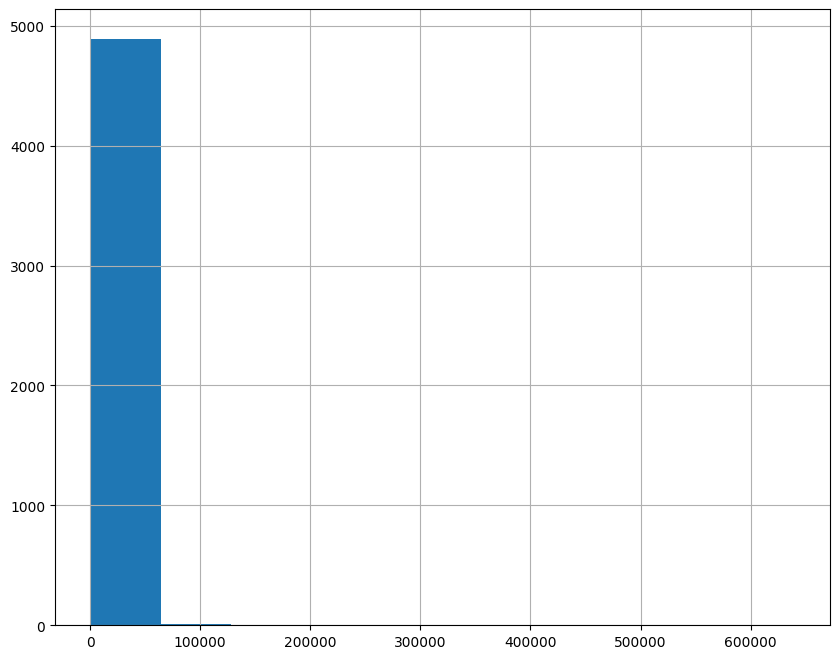

In [19]:
# 視覺化
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes.hist(ax=ax)

In [21]:
# 查看有多少值小於20000
criteria_high = fb_likes < 20000
print(criteria_high.mean() * 100)

90.85353432470971


In [22]:
# 用where() 篩選出20000以下的值
print(fb_likes.where(criteria_high).head())

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64


In [23]:
# 將20000以上的值 都設定成200000
print(fb_likes.where(criteria_high, other=20000).head())

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64


In [24]:
# 將300以下的值 都設定成300
criteria_low = fb_likes > 300
fb_likes_cap = (fb_likes
                .where(criteria_high, other=20000)
                .where(criteria_low, 300)
                )
print(fb_likes_cap.head())

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64


In [25]:
# 確認where() 沒有縮減資料集
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

<Axes: >

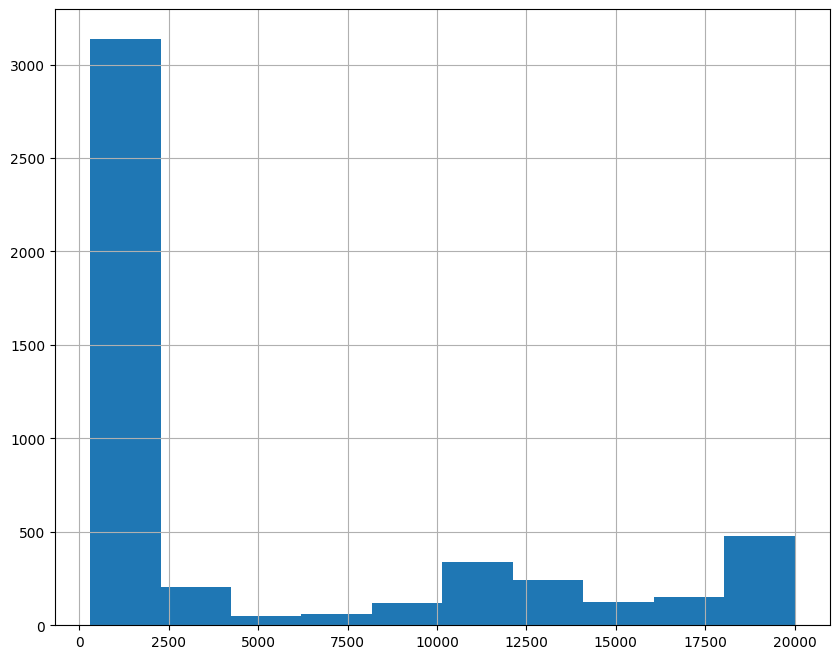

In [26]:
# 重新畫圖
fig, ax = plt.subplots(figsize=(10,8))
fb_likes_cap.hist(ax=ax)

In [27]:
# clip() 直接設定上下限
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
# 檢查是否結果是否與where() 相同
fb_likes_cap2.equals(fb_likes_cap)

True

## 7.9 對DataFrame 的列進行遮罩

In [ ]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')
# 遮罩條件
c1 = movie['title_year']  >= 2010
c2 = movie['title_year'].isna()
criteria = c1 | c2

In [29]:
# 傳入遮罩
print(movie.mask(criteria).head())

                                            color   director_name  \
movie_title                                                         
Avatar                                      Color   James Cameron   
Pirates of the Caribbean: At World's End    Color  Gore Verbinski   
Spectre                                       NaN             NaN   
The Dark Knight Rises                         NaN             NaN   
Star Wars: Episode VII - The Force Awakens    NaN             NaN   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                        NaN       NaN   
The Dark Knight Rises                                          NaN       NaN   
Star Wars: Episode VII - The Force A

In [30]:
# 移除整列都是缺失值的資料
movie_mask = movie.mask(criteria).dropna(how='all')
print(movie_mask.head())

                                          color   director_name  \
movie_title                                                       
Avatar                                    Color   James Cameron   
Pirates of the Caribbean: At World's End  Color  Gore Verbinski   
Spider-Man 3                              Color       Sam Raimi   
Harry Potter and the Half-Blood Prince    Color     David Yates   
Superman Returns                          Color    Bryan Singer   

                                          num_critic_for_reviews  duration  \
movie_title                                                                  
Avatar                                                     723.0     178.0   
Pirates of the Caribbean: At World's End                   302.0     169.0   
Spider-Man 3                                               392.0     156.0   
Harry Potter and the Half-Blood Prince                     375.0     153.0   
Superman Returns                                           434

In [31]:
# 用布林篩選執行相同操作 檢查結果是否一致
movie_boolean = movie[movie['title_year'] < 2010]
movie_mask.equals(movie_boolean)

False

In [32]:
# 檢查那些欄位資料型態不一樣
print(movie_mask.dtypes == movie_boolean.dtypes)

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool


In [33]:
# 使用pandas 的testing 模組 跳過資料型別檢查
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask,
                   check_dtype=False)

In [ ]:
# 比較速度
%timeit movie.mask(criteria).dropna(how='all')
%timeit movie[movie['title_year'] < 2010]

4.55 ms ± 55.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
520 μs ± 6.69 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 7.10 以布林陣列、位置數字和標籤選擇資料

In [36]:
# 載入資料集 並以title 為索引
movie = pd.read_csv('../../data/movie.csv', index_col='movie_title')

# 設定篩選條件
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [37]:
# 使用loc 過濾
movie_loc = movie.loc[criteria]
print(movie_loc.head())

                                color     director_name  \
movie_title                                               
The True Story of Puss'N Boots  Color  Jérôme Deschamps   
Doogal                          Color    Dave Borthwick   
Thomas and the Magic Railroad   Color    Britt Allcroft   
Barney's Great Adventure        Color       Steve Gomer   
Justin Bieber: Never Say Never  Color        Jon M. Chu   

                                num_critic_for_reviews  duration  \
movie_title                                                        
The True Story of Puss'N Boots                     4.0      80.0   
Doogal                                            31.0      77.0   
Thomas and the Magic Railroad                     47.0      85.0   
Barney's Great Adventure                          24.0      76.0   
Justin Bieber: Never Say Never                    84.0     115.0   

                                director_facebook_likes  \
movie_title                                       

In [38]:
# 使用iloc 過濾
movie_iloc = movie.iloc[criteria.to_numpy()]
movie_iloc.equals(movie_loc)

True

In [41]:
# 用布林索引選取欄
criteria_col = movie.dtypes == np.int64
print(criteria_col)

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
num_voted_users               True
cast_total_facebook_likes     True
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes          True
dtype: bool


In [42]:
# 用loc 選欄位
print(movie.loc[:, criteria_col].head())

                                            num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            mo

In [46]:
# 用iloc 選欄位
print(movie.iloc[:, criteria_col.to_numpy()].head())

                                            num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            mo

In [47]:
# 用loc 選列與欄
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
print(movie.loc[criteria, cols].sort_values('imdb_score'))

                               content_rating  imdb_score  title_year  \
movie_title                                                             
Justin Bieber: Never Say Never              G         1.6      2011.0   
Sunday School Musical                       G         2.5      2008.0   
Doogal                                      G         2.8      2006.0   
Barney's Great Adventure                    G         2.8      1998.0   
The True Story of Puss'N Boots              G         2.9      2009.0   
Thomas and the Magic Railroad               G         3.6      2000.0   

                                     gross  
movie_title                                 
Justin Bieber: Never Say Never  73000942.0  
Sunday School Musical                  NaN  
Doogal                           7382993.0  
Barney's Great Adventure        11144518.0  
The True Story of Puss'N Boots         NaN  
Thomas and the Magic Railroad   15911333.0  


In [49]:
# 用iloc 選列與欄
col_index = [movie.columns.get_loc(col) for col in cols]

print(movie.iloc[criteria.to_numpy(), col_index].sort_values('imdb_score'))

                               content_rating  imdb_score  title_year  \
movie_title                                                             
Justin Bieber: Never Say Never              G         1.6      2011.0   
Sunday School Musical                       G         2.5      2008.0   
Doogal                                      G         2.8      2006.0   
Barney's Great Adventure                    G         2.8      1998.0   
The True Story of Puss'N Boots              G         2.9      2009.0   
Thomas and the Magic Railroad               G         3.6      2000.0   

                                     gross  
movie_title                                 
Justin Bieber: Never Say Never  73000942.0  
Sunday School Musical                  NaN  
Doogal                           7382993.0  
Barney's Great Adventure        11144518.0  
The True Story of Puss'N Boots         NaN  
Thomas and the Magic Railroad   15911333.0  
